In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib

pd.set_option('display.max_rows', 200)


In [139]:
results0 = pd.read_csv('results_0.csv').iloc[:, 10:]
results1 = pd.read_csv('results_1.csv').iloc[:, 10:]
results2 = pd.read_csv('results_2.csv').iloc[:, 10:]
results3 = pd.read_csv('results_3.csv').iloc[:, 10:]
results4 = pd.read_csv('results_4.csv').iloc[:, 10:]

parameters0 = pd.read_csv('parameters_0.csv').iloc[:, 2:]

results0 = pd.concat([parameters0, results0], axis=1)
results1 = pd.concat([parameters0, results1], axis=1)
results2 = pd.concat([parameters0, results2], axis=1)
results3 = pd.concat([parameters0, results3], axis=1)
results4 = pd.concat([parameters0, results4], axis=1)

results = pd.concat([results0, results1, results2, results3, results4])
results['Gap'] *= 100
results['ObjVal_h2'] = results[['ObjVal_h', 'ObjVal_h2']].min(axis=1)
results.loc[results['init'] == True, 'Runtime_h2'] = results.loc[results['init']== True, 'Runtime_h2'].fillna(method='ffill', limit=1)
results.loc[results['init'] == True, 'Runtime'] = results.loc[results['init']== True, 'Runtime'].fillna(3600)
results.loc[results['init'] == True, 'NodeCount'] = results.loc[results['init']== True, 'NodeCount'].fillna(method='ffill', limit=1)
results.loc[results['init'] == True, 'Gap'] = results.loc[results['init']== True, 'Gap'].fillna(100)

results.to_csv('results_together.csv')





C:\Users\G731\AppData\Local\Temp/ipykernel_23624/303507592.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results.loc[results['init'] == True, 'Runtime_h2'] = results.loc[results['init']== True, 'Runtime_h2'].fillna(method='ffill', limit=1)
C:\Users\G731\AppData\Local\Temp/ipykernel_23624/303507592.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results.loc[results['init'] == True, 'NodeCount'] = results.loc[results['init']== True, 'NodeCount'].fillna(method='ffill', limit=1)


In [11]:
valores = 100*np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
results_noinit = results[results['init'] == False]['Gap']

# interval_noinit = pd.cut(results_noinit, bins = valores)

# noinit_freq_rel_acum = np.array(interval_noinit.value_counts(normalize=True, sort = False, dropna=False).cumsum())

results_init = results[results['init'] == True]['Gap']

# interval_init = pd.cut(results_init, bins = valores)

# init_freq_rel_acum = np.array(interval_init.value_counts(normalize=True, sort = False, dropna=False).cumsum())

# print(noinit_freq_rel_acum)
# plt.step(valores[:-1], noinit_freq_rel_acum[:-1], label='no initialisation')
# plt.step(valores[:-1], init_freq_rel_acum[:-1], label='initialisation')

# plt.grid(axis='x', color='0.95')
# plt.legend()

# f = Fitter(results_init.dropna(),
#            distributions= get_common_distributions())
# f.fit()
# f.summary()

# f.get_best(method='sumsquare_error')

In [137]:
tabla_comparadora = results.groupby(['n_N', 'single', 'perc_B', 'k', 'wL', 'init']).mean()[['Gap', 'Runtime', 'ObjVal']].round(2).reset_index()
tabla_comparadora

,n_N,single,perc_B,k,wL,init,Gap,Runtime,ObjVal
0,10,False,10.0%,1,0,False,0.00,3.18,356.59
1,10,False,10.0%,1,0,True,0.01,1.55,356.60
2,10,False,10.0%,1,50,False,0.00,2.11,618.00
3,10,False,10.0%,1,50,True,0.00,1.65,618.00
4,10,False,10.0%,10%,0,False,0.00,3.13,356.59
...,...,...,...,...,...,...,...,...,...
475,70,True,50.0%,10%,50,True,81.29,3600.32,3190.12
476,70,True,50.0%,25%,0,False,NaN,NaN,NaN
477,70,True,50.0%,25%,0,True,81.59,3600.07,533.94
478,70,True,50.0%,25%,50,False,NaN,NaN,NaN


Representamos la diferencia de gaps en funcion de $\omega_L$

c:\Users\G731\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\G731\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\G731\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\G731\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be r

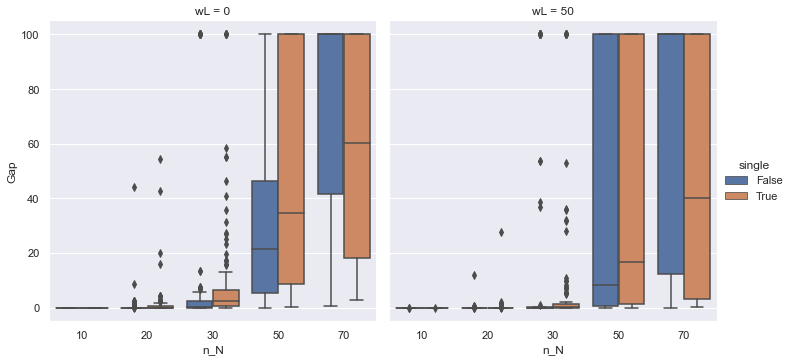

In [140]:
g = sns.catplot(x='n_N', y='Gap', hue='single', col='wL', kind='box', data=results, aspect=1, sharey=True)

sns.set(style="darkgrid")

import tikzplotlib

matplotlib.rcParams['axes.unicode_minus'] = False

tikzplotlib.save('difference_between_wL.tex', encoding='utf-8')


Representamos el gap en funcion del porcentaje de barreras considerado

c:\Users\G731\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\G731\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\G731\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\G731\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be r

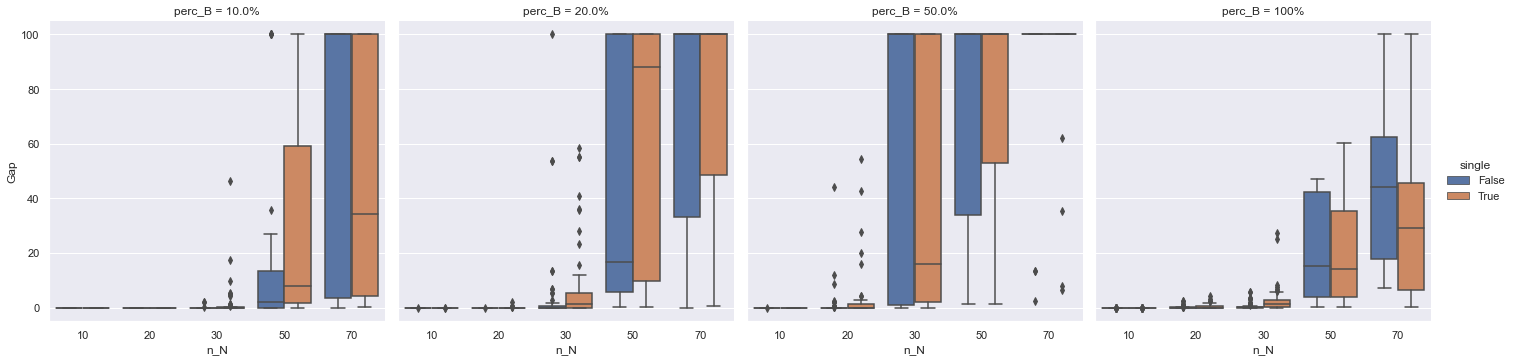

In [141]:
g = sns.catplot(x='n_N', y='Gap', hue='single', col='perc_B', kind='box', data=results, aspect=1, sharey=True)

sns.set(style="darkgrid")

import tikzplotlib

matplotlib.rcParams['axes.unicode_minus'] = False

tikzplotlib.save('difference_between_perc_B.tex', encoding='utf-8')


c:\Users\G731\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\G731\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\G731\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\G731\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be r

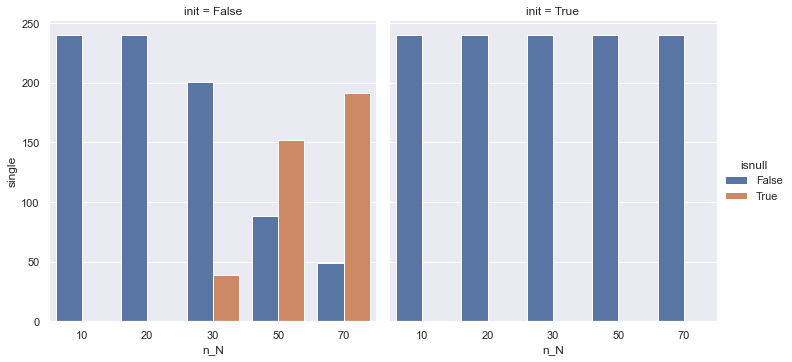

In [142]:
results_multi = results[results['single'] == False]

dictionary = {}

results['isnull'] = results.Gap.isnull()

prop_nan = results.groupby(['n_N', 'init', 'isnull']).count().reset_index()

g = sns.catplot(x='n_N', y='single', col='init', hue='isnull', kind='bar', data=prop_nan)
# results.Gap.isnull().groupby(['n_N', 'single', 'perc_B', 'k', 'wL', 'init']).sum()/len(results)

In [ ]:
# valores = [0, 400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 4000]
# results_noinit = results[results['init'] == False]['Runtime']

# interval_noinit = pd.cut(results_noinit, bins = valores)

# noinit_freq_rel_acum = np.array(interval_noinit.value_counts(normalize=True, sort = False, dropna=False).cumsum())

# results_init = results[results['init'] == True]['Runtime']

# interval_init = pd.cut(results_init, bins = valores)

# init_freq_rel_acum = np.array(interval_init.value_counts(normalize=True, sort = False, dropna=False).cumsum())

# print(noinit_freq_rel_acum)
# plt.step(valores[:-1], noinit_freq_rel_acum[:-1], label='no initialisation')
# plt.step(valores[:-1], init_freq_rel_acum[:-1], label='initialisation')

# plt.grid(axis='x', color='0.95')
# plt.legend()
